<a href="https://colab.research.google.com/github/kite121/Machine-Learning-Course/blob/main/Lab_3_LogisticModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Lab-3 : Self-Practice

#### In this week, your self-practice task will consist to analyze the impact of class imballance on the performance of the logistic regression model.

#### Class imbalance is very common in real life. For example, in a classification problem to predict whether a person has a certain very rare disease, the dataset will always contain more negative samples than positive ones. This situation can have a significant impact on the performance of the model. You will analyze this situation in the case of the Titanic dataset used in the lab.

### 1. Load the titanic dataset and <b>PLOT</b> the proportion of positive and negative samples (survived vs non survived)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [2]:
df = pd.read_csv("/content/Train_test_data/titanic.csv")

In [3]:
df["survived"].value_counts(normalize = True)

,proportion
survived,
0,0.618029
1,0.381971


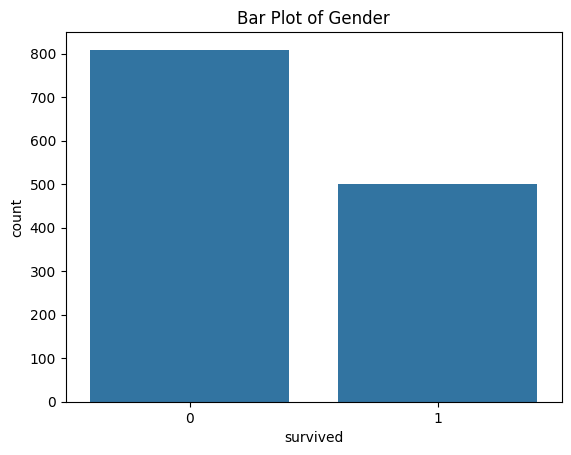

In [4]:
sns.countplot(data=df, x="survived")
plt.title("Bar Plot of Gender")
plt.show()


#### Preprocess the data as it has been done in the lab, feel free to adapt

In [5]:
df = df.drop(['name'], axis = 1)

In [6]:
df.isna().sum()

,0
survived,0
pclass,0
sex,0
age,263
sibsp,0
parch,0
fare,1
embarked,2


In [7]:
df[["age", "fare"]] = df[["age","fare"]].fillna(df[["age","fare"]].mean())
df["embarked"] = df["embarked"].fillna(df["embarked"].mode()[0])

In [8]:
assert df.isna().sum().sum() == 0

In [9]:
# one-hot-encode categorical features
def ohe_new_features(df, features_name, encoder):
    encoder.fit(df[features_name])
    new_feats = encoder.transform(df[features_name])
    # create dataframe from encoded features with named columns
    new_cols = pd.DataFrame(new_feats, columns=encoder.get_feature_names_out(features_name))
    new_df = pd.concat([df, new_cols], axis=1)
    new_df.drop(features_name, axis=1, inplace=True)
    return new_df

encoder = OneHotEncoder(drop='first', sparse_output=False)
f_names = ['sex', 'embarked']
df = ohe_new_features(df, f_names, encoder)


In [10]:
assert df.select_dtypes(np.number).columns.size == df.columns.size

## 2. Impact of class imballance.
##### Now, you will `artificially` imbalance the dataset. From the original dataset, create different dataset with the following class representations (drop samples from one class):
##### 1. 20% vs 80%
##### 2. 30% vs 70%
##### 3. 40% vs 60%

## Split each data into train and test set as in the lab; train logistic regression model for each setting and report (PLOT) the accuracy, precision, and recall of each model

In [11]:
df_20_80 = df.drop(np.random.choice(df.loc[df["survived"] == 1].index, size = 455))
df_30_70 = df.drop(np.random.choice(df.loc[df["survived"] == 1].index, size = 185))
df_40_60 = df.drop(np.random.choice(df.loc[df["survived"] == 0].index, size = 62))
print(df_20_80["survived"].value_counts(normalize = True))
print(df_30_70["survived"].value_counts(normalize = True))
print(df_40_60["survived"].value_counts(normalize = True))

survived
0    0.795477
1    0.204523
Name: proportion, dtype: float64
survived
0    0.701648
1    0.298352
Name: proportion, dtype: float64
survived
0    0.59968
1    0.40032
Name: proportion, dtype: float64


In [12]:
x_train_20_80, x_val_20_80, y_train_20_80, y_val_20_80 = \
 train_test_split(df_20_80.drop(columns = ["survived"]), df_20_80["survived"], test_size = 0.2)
x_train_30_70, x_val_30_70, y_train_30_70, y_val_30_70 = \
 train_test_split(df_30_70.drop(columns = ["survived"]), df_30_70["survived"], test_size = 0.2)
x_train_40_60, x_val_40_60, y_train_40_60, y_val_40_60 = \
 train_test_split(df_40_60.drop(columns = ["survived"]), df_40_60["survived"], test_size = 0.2)

In [13]:
pipe_20_80 = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])
pipe_30_70 = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])
pipe_40_60 = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression())
])

In [14]:
pipe_20_80.fit(x_train_20_80, y_train_20_80)
pipe_30_70.fit(x_train_30_70, y_train_30_70)
pipe_40_60.fit(x_train_40_60, y_train_40_60)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LogisticRegression())])

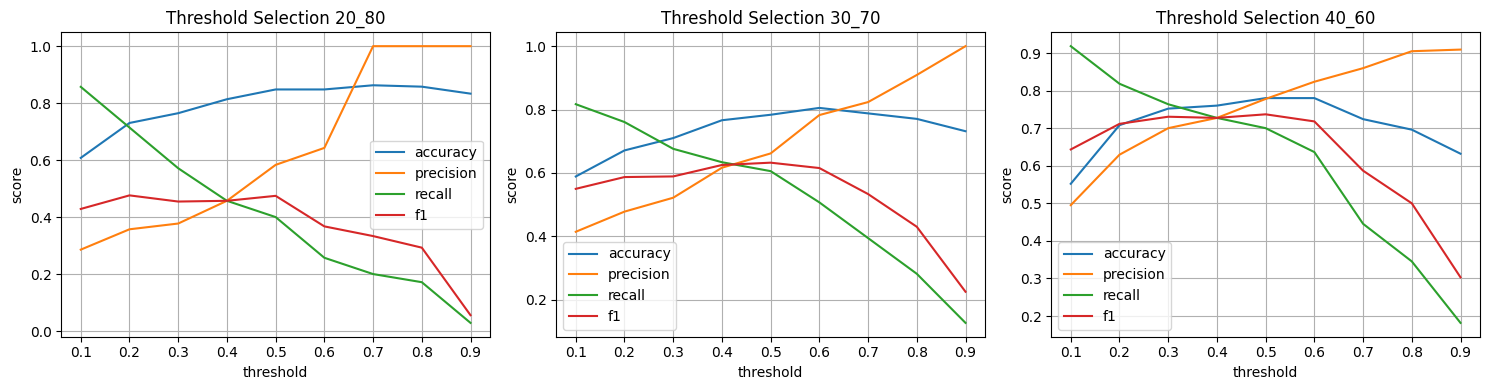

In [24]:
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

pred_proba_20_80 = pipe_20_80.predict_proba(x_val_20_80)
pred_proba_30_70 = pipe_30_70.predict_proba(x_val_30_70)
pred_proba_40_60 = pipe_40_60.predict_proba(x_val_40_60)

results_20_80 = [[], [], [], []]  # acc, prec, rec, f1
results_30_70 = [[], [], [], []]
results_40_60 = [[], [], [], []]

for thr in thresholds:
    y_pred_20_80 = (pred_proba_20_80[:, 1] > thr).astype(int)
    y_pred_30_70 = (pred_proba_30_70[:, 1] > thr).astype(int)
    y_pred_40_60 = (pred_proba_40_60[:, 1] > thr).astype(int)

    # 20_80
    results_20_80[0].append(metrics.accuracy_score(y_val_20_80, y_pred_20_80))
    results_20_80[1].append(metrics.precision_score(y_val_20_80, y_pred_20_80))
    results_20_80[2].append(metrics.recall_score(y_val_20_80, y_pred_20_80))
    results_20_80[3].append(metrics.f1_score(y_val_20_80, y_pred_20_80))

    # 30_70
    results_30_70[0].append(metrics.accuracy_score(y_val_30_70, y_pred_30_70))
    results_30_70[1].append(metrics.precision_score(y_val_30_70, y_pred_30_70))
    results_30_70[2].append(metrics.recall_score(y_val_30_70, y_pred_30_70))
    results_30_70[3].append(metrics.f1_score(y_val_30_70, y_pred_30_70))

    # 40_60
    results_40_60[0].append(metrics.accuracy_score(y_val_40_60, y_pred_40_60))
    results_40_60[1].append(metrics.precision_score(y_val_40_60, y_pred_40_60))
    results_40_60[2].append(metrics.recall_score(y_val_40_60, y_pred_40_60))
    results_40_60[3].append(metrics.f1_score(y_val_40_60, y_pred_40_60))

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# 20_80
axes[0].plot(thresholds, results_20_80[0], label='accuracy')
axes[0].plot(thresholds, results_20_80[1], label='precision')
axes[0].plot(thresholds, results_20_80[2], label='recall')
axes[0].plot(thresholds, results_20_80[3], label='f1')
axes[0].set_title('Threshold Selection 20_80')
axes[0].set_xlabel('threshold')
axes[0].set_ylabel('score')
axes[0].legend()
axes[0].grid()

# 30_70
axes[1].plot(thresholds, results_30_70[0], label='accuracy')
axes[1].plot(thresholds, results_30_70[1], label='precision')
axes[1].plot(thresholds, results_30_70[2], label='recall')
axes[1].plot(thresholds, results_30_70[3], label='f1')
axes[1].set_title('Threshold Selection 30_70')
axes[1].set_xlabel('threshold')
axes[1].set_ylabel('score')
axes[1].legend()
axes[1].grid()

# 40_60
axes[2].plot(thresholds, results_40_60[0], label='accuracy')
axes[2].plot(thresholds, results_40_60[1], label='precision')
axes[2].plot(thresholds, results_40_60[2], label='recall')
axes[2].plot(thresholds, results_40_60[3], label='f1')
axes[2].set_title('Threshold Selection 40_60')
axes[2].set_xlabel('threshold')
axes[2].set_ylabel('score')
axes[2].legend()
axes[2].grid()

plt.tight_layout()
plt.show()


## 3. Analyse the class-wise accuracy.
#### For each model, plot (bar plots) the class-wise accuracy, i.e., the accuracy for each class.

In [26]:
from sklearn.metrics import confusion_matrix
import numpy as np

def classwise_accuracy(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    acc_per_class = cm.diagonal() / cm.sum(axis=1)
    return acc_per_class

y_pred_20_80 = pipe_20_80.predict(x_val_20_80)
y_pred_30_70 = pipe_30_70.predict(x_val_30_70)
y_pred_40_60 = pipe_40_60.predict(x_val_40_60)

acc_20_80 = classwise_accuracy(y_val_20_80, y_pred_20_80)
acc_30_70 = classwise_accuracy(y_val_30_70, y_pred_30_70)
acc_40_60 = classwise_accuracy(y_val_40_60, y_pred_40_60)


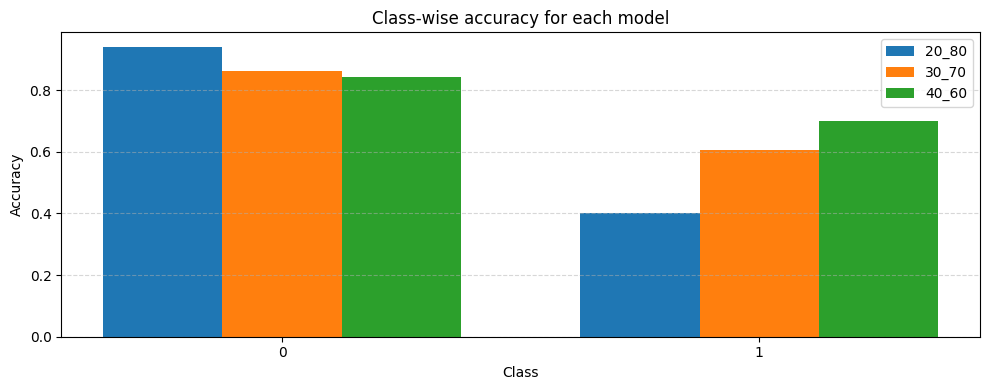

In [29]:
classes = [0, 1]
x = np.arange(2)
width = 0.25

fig, ax = plt.subplots(figsize=(10, 4))

ax.bar(x - width, acc_20_80, width, label='20_80')
ax.bar(x,         acc_30_70, width, label='30_70')
ax.bar(x + width, acc_40_60, width, label='40_60')

ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.set_xlabel('Class')
ax.set_ylabel('Accuracy')
ax.set_title('Class-wise accuracy for each model')
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


## 4. Report
### Write a small report (few sentences) to discuss from your analysis, the impact of class imballance on logistic model's performance

Class imbalance had a clear impact on the logistic regression model’s behaviour and evaluation. In the imbalanced setting, the model tended to favour the majority class, which kept the overall accuracy relatively high while significantly degrading recall and F1-score for the minority class. This effect became especially visible when inspecting class-wise metrics and threshold curves: small changes in the decision threshold led to large swings in minority-class recall, confirming that the model is less confident and less stable for the underrepresented class.